In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
import pandas as pd

df = pd.read_csv('/breast-cancer.data', names=['class','age', 'menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])

df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a DataFrame
df = pd.read_csv('/breast-cancer.data', names=['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])

# Create a label encoder instance
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains object (string) values
        df[column] = label_encoder.fit_transform(df[column])  # Encode the values using label encoding

# Print the updated DataFrame
print(df.head())


   class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      0    1          2           5          0          1          3       0   
1      0    2          2           3          0          1          2       1   
2      0    2          2           3          0          1          2       0   
3      0    4          0           2          0          1          2       1   
4      0    2          2           0          0          1          2       1   

   breast-quad  irradiat  
0            2         0  
1            5         0  
2            2         0  
3            3         0  
4            4         0  


In [ ]:
df['irradiat'].unique()

array([0, 1])

In [ ]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   class        286 non-null    int64
 1   age          286 non-null    int64
 2   menopause    286 non-null    int64
 3   tumor-size   286 non-null    int64
 4   inv-nodes    286 non-null    int64
 5   node-caps    286 non-null    int64
 6   deg-malig    286 non-null    int64
 7   breast       286 non-null    int64
 8   breast-quad  286 non-null    int64
 9   irradiat     286 non-null    int64
dtypes: int64(10)
memory usage: 22.5 KB


In [ ]:
df.describe()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.297203,2.664336,1.073427,4.062937,1.073427,1.167832,2.048951,0.468531,2.772727,0.237762
std,0.457828,1.011818,0.986680,2.151187,1.935321,0.443052,0.738217,0.499883,1.099006,0.426459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,2.000000,0.000000,3.000000,0.000000
75%,1.000000,3.000000,2.000000,5.000000,1.000000,1.000000,3.000000,1.000000,3.000000,0.000000
max,1.000000,5.000000,2.000000,10.000000,6.000000,2.000000,3.000000,1.000000,5.000000,1.000000


In [ ]:
list(df.columns)

['class',
 'age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat']

In [ ]:
print(len(df.columns))

10


In [ ]:
len(df)

286

total cell

In [ ]:
col = len(df.columns)
row = len(df)

total_cell = col * row
print("Total Cell : ",total_cell)

Total Cell :  2860


In [ ]:
df1 = df.apply(lambda x:sum(x.duplicated()))
print(df1)

class          284
age            280
menopause      283
tumor-size     275
inv-nodes      279
node-caps      283
deg-malig      283
breast         284
breast-quad    280
irradiat       284
dtype: int64


In [ ]:
# amount of missing values in each column 
df.isna().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

<Figure size 1000x600 with 0 Axes>

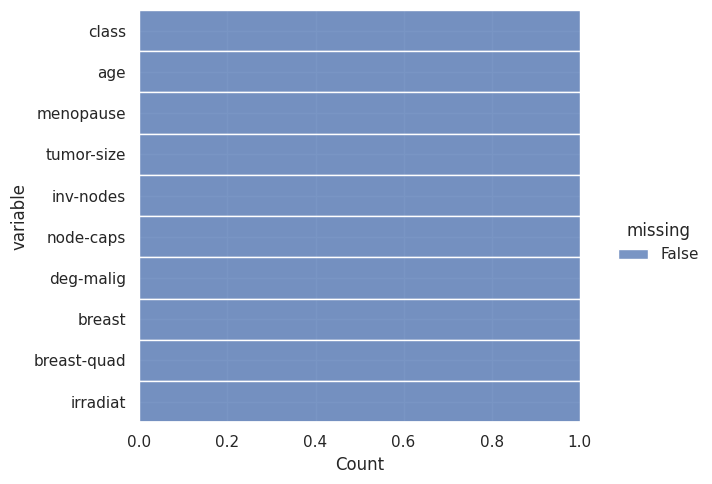

In [ ]:
# Detect missing values and Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.displot(
    data= df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing.png", dpi=100)


In [ ]:
correlation = df.corr()
correlation

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
class,1.000000,-0.071719,0.052498,0.130573,0.292088,0.237577,0.299400,-0.058646,0.037087,0.193912
age,-0.071719,1.000000,-0.720322,-0.016053,-0.042916,-0.093049,-0.085968,-0.041769,-0.049912,-0.042080
menopause,0.052498,-0.720322,1.000000,-0.003838,-0.021208,0.068029,-0.043490,0.058056,0.093102,0.041752
tumor-size,0.130573,-0.016053,-0.003838,1.000000,0.149747,0.158226,0.163765,0.031215,0.150034,0.159568
inv-nodes,0.292088,-0.042916,-0.021208,0.149747,1.000000,0.488907,0.282365,0.022345,0.021071,0.382650
node-caps,0.237577,-0.093049,0.068029,0.158226,0.488907,1.000000,0.328815,0.023930,0.071406,0.196613
deg-malig,0.299400,-0.085968,-0.043490,0.163765,0.282365,0.328815,1.000000,-0.052861,0.031060,0.208099
breast,-0.058646,-0.041769,0.058056,0.031215,0.022345,0.023930,-0.052861,1.000000,0.213669,0.018761
breast-quad,0.037087,-0.049912,0.093102,0.150034,0.021071,0.071406,0.031060,0.213669,1.000000,0.018376
irradiat,0.193912,-0.042080,0.041752,0.159568,0.382650,0.196613,0.208099,0.018761,0.018376,1.000000


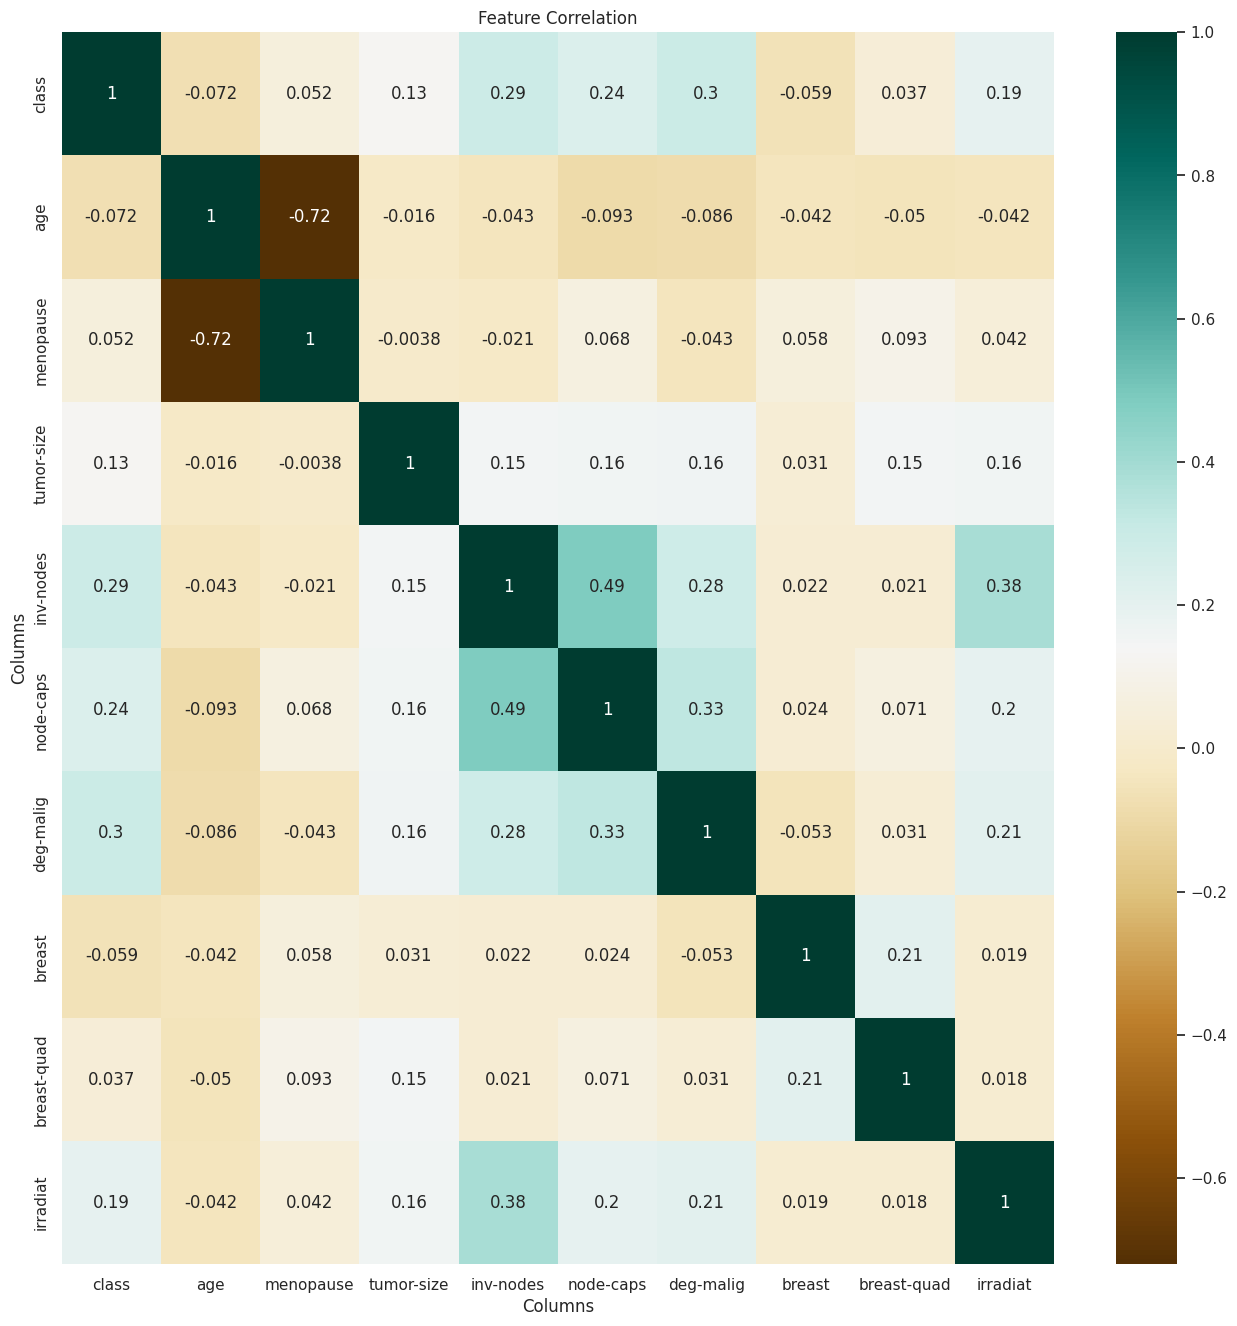

In [ ]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show();

Replacing categorical values with number

In [ ]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


In [ ]:
X = df.drop(['irradiat'], axis=1)
y = df['irradiat']

In [ ]:
X.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,1,2,5,0,1,3,0,2
1,0,2,2,3,0,1,2,1,5
2,0,2,2,3,0,1,2,0,2
3,0,4,0,2,0,1,2,1,3
4,0,2,2,0,0,1,2,1,4


In [ ]:
y.unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth=5, random_state = 0
                                    )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
rf_accuracy = acc * 100
print("%.2f" % round(rf_accuracy, 2),"%")

77.78 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        53
           1       0.80      0.21      0.33        19

    accuracy                           0.78        72
   macro avg       0.79      0.60      0.60        72
weighted avg       0.78      0.78      0.73        72



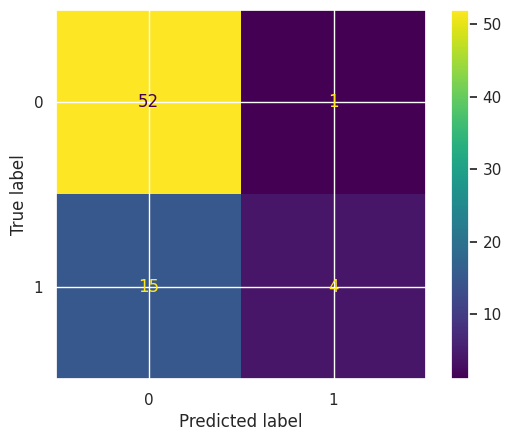

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

# XGboost

In [ ]:
from math import gamma
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(gamma=0.1,eta=1,
                           min_child_weight=10,
                           max_delta_step=10)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
rf_accuracy = acc * 100
print("%.2f" % round(rf_accuracy, 2),"%")

80.56 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.78      0.37      0.50        19

    accuracy                           0.81        72
   macro avg       0.79      0.67      0.69        72
weighted avg       0.80      0.81      0.78        72



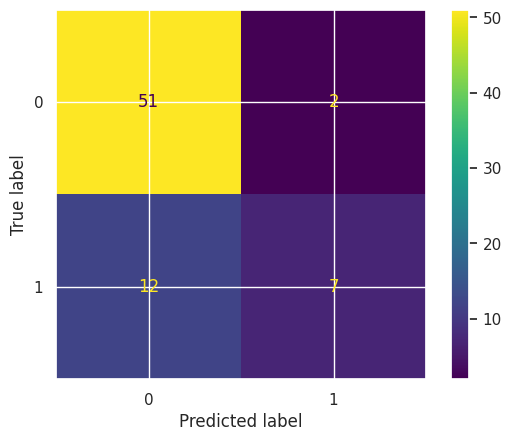

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')